<img src="fligh-clock.jpg" width="140" height="360" align="left"/><br>&nbsp;&nbsp;

# EDA - NYC Flight Data  

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Deatiled observations](#section305)<br/>
    - 3.6 [Final observations](#section306)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Missing data and its imputation](#section401)<br/>
    - 4.2 [Outlier Treatment](#section402)<br/>
    - 4.3 [Handling NaN data in categorical variables](#section403)<br/>            
    - 4.4 [Grouping](#section404)<br/>
- 5. [Identify patterns in the data](#section5)</br>
    - 5.1 [Flight Departed per Month](#section501)<br/>
    - 5.2 [Departure Delay v. Month of the year](#section502)<br/>
    - 5.3 [Number of flights v. route (Origin - Destination)](#section503)<br/>
    - 5.4 [Average speed of a flight v. top Fastest speed flights](#section504)<br/>
    - 5.5 [Monthly distribution of departure delay count per Flight carrier](#section505)<br/>
    - 5.6 [Departure delay v. arrival delay](#section506)<br/>
- 6. [Analysis through questions](#section6)</br>
     - 6.1 [How does the departrue delay of Flight vary by airport(origin) location?](#section601)<br/>
         - 6.1.1 [Which Airport has observed most departure delays?](#section602)<br/>
         - 6.1.2 [Which flight Carrier contributes the most?](#section603)<br/>
         - 6.1.3 [What is the contribution of top 3 carriers among all?](#section604)<br/>
         - 6.1.4 [What is the count and percentage of departure early and carrier for the top 3 destinations?](#section605)<br/>
         - 6.1.5 [What is the count and percentage of arrival early and carrier for the top 3 destinations?](#section606)<br/>
         - 6.1.6 [The most 'on-time' departure Flight carrier?](#section607)<br/>
     - 6.2 [Interesting observations through Analysis.](#section608)<br/>
- 7. [Conclusion](#section7)<br/>

<a id=section1></a> 
## 1. Problem Statement

"This is a On-time data for all flights that departed NYC (i.e. JFK, LGA or EWR) in 2013"

```Analyze delays in the flight departure - arrival and its association with data variable to identify informative insights```

<a id=section101></a> 
### 1.1. Introduction
This is a Capstone project on completion Term 1 and 2 part of GCD at ISAID. The project is an attempt to relfect the knowladge gained during last 3 months, skills learned till now are python, statistic, advance python and EDA (Exploratory Data Analysis).  This notebook is an attempt to exhibit the observations on NYC Flight dataset and explains thoroughly how to approach the data set. While analysing the NYC Flight Data tried to figure out the answers to few questions related to the dataset 

<a id=section102></a> 
### 1.2. Data source and dataset

__a__. How was it collected? 

- Website: https://github.com/insaid2018/Term-1/tree/master/Data/Projects  <br/>
- Data: NYC_Flight_Data.rar <br/>

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. As per the data dictionary available at data source website, the dataset has On-time data for all flights that departed NYC (i.e. JFK, LGA or EWR) in 2013. Assumption that this sample data could have been collected from Bureau of Transportation Statistic USA.

#### Metadata for Datasource

year,month,day - Date of departure<br>

dep_time,arr_time - Actual departure and arrival times (format HHMM or HMM), local tz. <br>

sched_dep_time,sched_arr_time - Scheduled departure and arrival times (format HHMM or HMM),local tz. <br>

dep_delay,arr_delay - Departure  and  arrival  delays,  in  minutes.   Negative  times  represent  early departures/arrivals.<br>

hour,minute - Time of scheduled departure broken into hour and minutes.<br>

carrier - Two letter carrier abbreviation <br>

tailnum - Plane tail number <br>

flight - Flight number<br>

origin,dest - Origin and destination. <br>

air_time - Amount of time spent in the air, in minutes<br>

distance - Distance between airports, in miles <br>

time_hour - Scheduled date and hour of the flight as a POSIXct date<br>


<a id=section2></a> 
### 2. Load the packages and data 

1. The __NYC Flight__ dataset has collection of flights departed from __Airport JFK, EWR, LGA__ as origin during year 2013. The obvious things can happen with any transportation mode is the delay in departure and arrival. This dataset has data collection for each flight delay in take-off(departure) and landing (arrival) during 2013 at airports JFK, EWR, LGA.

In [263]:
# Code 1 
# Code 2

In [264]:
import sys                                                                      # Import relavent packages to perform EDA
import time
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns


In [265]:
# As the dataset at source was in rar (compressed) format, it was downloaded and extracted at local machine/desktop
# Load in the dataset as df_nyc_flights
df_nyc_flights = pd.read_csv('C:/Users/Admin/Documents/Data Science/Projects/NYC_Flight_Data.csv')                       

<a id=section3></a> 
### 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

<a id=section301></a>
#### 3.1 Data types in the dataset

In [266]:
df_nyc_flights.info()           # Display the data type for each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 20 columns):
ID                336776 non-null int64
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(10), object(5)
memory usage: 51.4+ MB


- ```info``` function gives us the following insights into the df_nyc_flights dataframe:

  - There are a total of **336,776 samples (rows)** and **20 columns** in the dataframe.
  
  - There are **15 columns** with a **numeric** datatype (float, int) and **5 columns** with an **object** datatype.
  
  - There are **6 columns** with missing values in the data. 

<a id=section302><a/>
#### 3.2 Display the first five rows of the data set

In [267]:
df_nyc_flights.head()                                                       

,ID,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


<a id=section303><a/>
#### 3.3 Get the descriptive statistics for numerical variables in the dataset

In [268]:
df_nyc_flights.describe()                                           # Descriptive statistics for the numerical variables

,ID,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.000000,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,168388.500000,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,97219.001466,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,1.000000,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,84194.750000,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,168388.500000,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,252582.250000,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,336776.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


#### Quick Observations:-

The dataset describe funciton has given the descriptive statistic for numerical variables of dataset.
 - 5  columns shows missing values this includes the key columns dep_delay and arr_delay
 - The missing values in delay columns are could be due to null/nan in the departure/arrival time column
 - The __-ve values__ in the column __'dep_delay'__ and __'arr_delay'__, shows __early__ departure/arrival of flight
 - From above it looks there is a flight on the __shorted distance,__ as distance column shows min. distance as __17 miles__
 - The Max delay shows __1301 minutes__ on departure and __1272 minutes__ on arrival, which is almost 21+ hrs. i.e. delayed by a day. These data points could be outliers in the dataset

<a id=section304></a> 
#### 3.4 Display the random 10 sample rows from dataset

In [269]:
df_nyc_flights.sample(10)

,ID,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
201184,201185,2013,5,9,1007.0,1010,-3.0,1129.0,1125,4.0,MQ,3795,N507MQ,EWR,ORD,102.0,719,10,10,09-05-2013 10:00
211487,211488,2013,5,20,1406.0,1327,39.0,1607.0,1545,22.0,F9,507,N213FR,LGA,DEN,207.0,1620,13,27,20-05-2013 13:00
98143,98144,2013,12,17,911.0,900,11.0,1058.0,1034,24.0,UA,1030,N77867,EWR,ORD,109.0,719,9,0,17-12-2013 09:00
54081,54082,2013,10,30,655.0,700,-5.0,853.0,838,15.0,EV,3829,N34110,EWR,STL,155.0,872,7,0,30-10-2013 07:00
176364,176365,2013,4,12,1936.0,1859,37.0,2238.0,2230,8.0,B6,87,N520JB,JFK,SLC,262.0,1990,18,59,12-04-2013 18:00
263696,263697,2013,7,15,957.0,950,7.0,1205.0,1220,-15.0,VX,251,N855VA,JFK,LAS,282.0,2248,9,50,15-07-2013 09:00
92697,92698,2013,12,11,852.0,900,-8.0,958.0,1016,-18.0,US,2140,N950UW,LGA,BOS,39.0,184,9,0,11-12-2013 09:00
325422,325423,2013,9,18,1708.0,1715,-7.0,1858.0,1940,-42.0,9E,3310,N922XJ,JFK,MCI,147.0,1113,17,15,18-09-2013 17:00
310073,310074,2013,9,2,806.0,815,-9.0,956.0,1009,-13.0,US,409,N648AW,EWR,CLT,87.0,529,8,15,02-09-2013 08:00
63799,63800,2013,11,9,1458.0,1454,4.0,1609.0,1616,-7.0,EV,6054,N12924,EWR,IAD,47.0,212,14,54,09-11-2013 14:00


<a id=section305></a> 
### 3.5. Deatiled observations:


   - Departure and arrival time columns contians time in format HHMM or HMM, however theri datatype is as float the data present in 1 or 2 digit numbers is the actual minutes passed mid-night (00:MM)

   - Column __dep_delay__ has few __NaN__ values, if possible need to find out how to fix? else drop the flight records
   
   - Column __arr_delay__ has few __NaN__ values, if possible need to find out how to fix? else drop the flight records

   - The % of __NaN__ values in delay columns __(arrival and departure) is very low, i.e. approx. 2.8%__, this might not impact further analysis however this can be  reduced by either imputing or dropping such records
   
   - Column __airtime__ has missing values, further analysis needed to see if these can be updated from the current dataset i.e. using a flight carrier with same origin and destination (the average/mean value) or if not impacting analysis may ignore

   - Missing flight tail numbers, this data may not be impacting data analysis and in during data clean up it may be reduced


#### Explore the dataset for missing data

In [270]:
#find missing data
total = df_nyc_flights.isnull().sum().sort_values(ascending=False)
percent = ((df_nyc_flights.isnull().sum()/df_nyc_flights.isnull().count())*100).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print(missing_data)

                Total   Percent
arr_delay        9430  2.800081
air_time         9430  2.800081
arr_time         8713  2.587180
dep_time         8255  2.451184
dep_delay        8255  2.451184
tailnum          2512  0.745896
sched_arr_time      0  0.000000
year                0  0.000000
month               0  0.000000
day                 0  0.000000
sched_dep_time      0  0.000000
time_hour           0  0.000000
minute              0  0.000000
carrier             0  0.000000
flight              0  0.000000
origin              0  0.000000
dest                0  0.000000
distance            0  0.000000
hour                0  0.000000
ID                  0  0.000000


#### Explore the dataset numeric variables impacting Departure and confirm whether all values are within a reasonable range and if any are NaN.

In [271]:
print("Scheduled Departure")                                                                
print("Minimum value: ", df_nyc_flights["sched_dep_time"].min())  #find minimum value for Scheduled departure (minutes)
print("Maximum value: ", df_nyc_flights["sched_dep_time"].max())  #find maximum value for Scheduled departure (minutes)
print("How many values are NaN?: ", pd.isnull(df_nyc_flights['sched_dep_time']).sum()) #find total NaN values for Scheduled departure

Scheduled Departure
Minimum value:  106
Maximum value:  2359
How many values are NaN?:  0


In [272]:
print("Actual Departure Time")                                                                
print("Minimum value: ", df_nyc_flights["dep_time"].min()) #find minimum value for actual departure (minutes)
print("Maximum value: ", df_nyc_flights["dep_time"].max()) #find maximum value for actual departure (minutes)
print("How many values are NaN?: ", pd.isnull(df_nyc_flights['dep_time']).sum()) #find total NaN values for actual departure

Actual Departure Time
Minimum value:  1.0
Maximum value:  2400.0
How many values are NaN?:  8255


In [273]:
print("Departure Delayed")                                                                
print("Minimum value: ", df_nyc_flights["dep_delay"].min()) #find minimum value for departure delayed (minutes)
print("Maximum value: ", df_nyc_flights["dep_delay"].max()) #find maximum value for departure delayed (minutes)
print("How many values are NaN?: ", pd.isnull(df_nyc_flights['dep_delay']).sum())  #find total NaN value for departure delayed

Departure Delayed
Minimum value:  -43.0
Maximum value:  1301.0
How many values are NaN?:  8255


#### Explore the dataset variables impacting Arrival and confirm whether all values are within a reasonable range and if any are NaN.

In [274]:
print("Scheduled Arrival")                                                                
print("Minimum value: ", df_nyc_flights["sched_arr_time"].min()) #find minimum value for scheduled Arrival (minutes)
print("Maximum value: ", df_nyc_flights["sched_arr_time"].max()) #find maximum value for scheduled Arrival (minutes)
print("How many values are NaN?: ", pd.isnull(df_nyc_flights['sched_arr_time']).sum()) #find total NaN value for scheduled Arrival

Scheduled Arrival
Minimum value:  1
Maximum value:  2359
How many values are NaN?:  0


In [275]:
print("Actual Arrival Time")                                                                
print("Minimum value: ", df_nyc_flights["arr_time"].min())  #find minimum value for Actual arrival (minutes)
print("Maximum value: ", df_nyc_flights["arr_time"].max())  #find maximum value for Actual arrival (minutes)
print("How many values are NaN?: ", pd.isnull(df_nyc_flights['arr_time']).sum()) #find total NaN value for Actual Arrival

Actual Arrival Time
Minimum value:  1.0
Maximum value:  2400.0
How many values are NaN?:  8713


In [276]:
print("Arrival Delayed")                                                                
print("Minimum value: ", df_nyc_flights["arr_delay"].min()) #find minimum value for arrival delayed (minutes)
print("Maximum value: ", df_nyc_flights["arr_delay"].max()) #find maximum value for arrival delayed (minutes)
print("How many values are NaN?: ", pd.isnull(df_nyc_flights['arr_delay']).sum()) #find total NaN value for arrival delayed

Arrival Delayed
Minimum value:  -86.0
Maximum value:  1272.0
How many values are NaN?:  9430


#### Airtime (in minutes) missing

In [277]:
print("Flight Airtime")                                                                
print("Minimum value: ", df_nyc_flights["air_time"].min())  #find minimum value for Flight Airtime (minutes)
print("Maximum value: ", df_nyc_flights["air_time"].max())  #find maximum value for Flight Airtime (minutes)
print("How many values are NaN?: ", pd.isnull(df_nyc_flights['air_time']).sum()) #find total NaN value for Flight Airtime

Flight Airtime
Minimum value:  20.0
Maximum value:  695.0
How many values are NaN?:  9430


<a id=section306></a> 
### 3.6. Final observations 

- Variables to transform prior to analysis:
 
  - __Timestamp__: convert to datetime
<br><br>
- Handle NaN values recommandation
  - __dep_delay__: impute from dataset where arrival time and schedule arrival data is available
  - __arr_delay__: impute from dataset where arrival time and schedule arrival data is available
  - __air_time__ : impute missing values by grouping the route and take a mean of air time  


<a id=section4></a> 
### 4. Data Normalization

<a id=section401></a>
### 4.1. Missing Data and its imputation

In [278]:
# add new column Date , the value in this column to be imputed from exisitng columns 'year','month' and 'day'
df_nyc_flights['date'] = pd.to_datetime(df_nyc_flights[['year','month','day']], yearfirst=False)

# add new column Month-year, this is will be used during plotting chart, grouping the data month basis
month_dict={ 1:'Jan-13', 2:'Feb-13', 3:'Mar-13', 4:'Apr-13', 5:'May-13', 6:'Jun-13', 7:'Jul-13', 8:'Aug-13', 9:'Sep-13', 10: 'Oct-13', 11: 'Nov-13', 12:'Dec-13'}
df_nyc_flights['month_year'] = df_nyc_flights['month'].apply(lambda m: month_dict[m])


In [279]:
# check missing data is any!
# review the dataframe after cleaning the data, all NaN or null data has been cleaned

total = df_nyc_flights.isnull().sum().sort_values(ascending=False)
percent = ((df_nyc_flights.isnull().sum()/df_nyc_flights.isnull().count())*100).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print(missing_data)

                Total   Percent
arr_delay        9430  2.800081
air_time         9430  2.800081
arr_time         8713  2.587180
dep_time         8255  2.451184
dep_delay        8255  2.451184
tailnum          2512  0.745896
month_year          0  0.000000
year                0  0.000000
month               0  0.000000
day                 0  0.000000
sched_dep_time      0  0.000000
sched_arr_time      0  0.000000
carrier             0  0.000000
date                0  0.000000
flight              0  0.000000
origin              0  0.000000
dest                0  0.000000
distance            0  0.000000
hour                0  0.000000
minute              0  0.000000
time_hour           0  0.000000
ID                  0  0.000000


<a id=section402></a> 
### 4.2. Outliers Treatment

The results from section 4.1, it looks 2.4% to 2.8% data missing in delay & arrival columns, which are the key column for the analysis of this project

We also need a detailed analysis to perform on the outliers, should look more closely at the rows where the depature data is out-of-range, any NaN values and it may help in deciding whether it makes more sense to remove them.

#### View the flight departure delay distribution using the sample (2 months data)
    -the distribution of departure data will help to identify the outliers and its impact

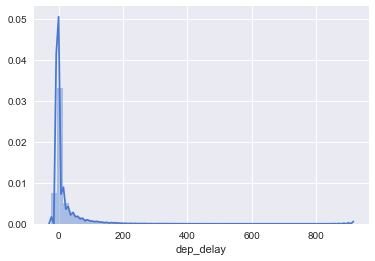

In [280]:
# Plot a histogram of the flights departure delayed for month 3 (March)
sns.set(color_codes=True)                    
sns.set_palette(sns.color_palette("muted"))

sns.distplot(df_nyc_flights[(df_nyc_flights['month']==3)]["dep_delay"].dropna());


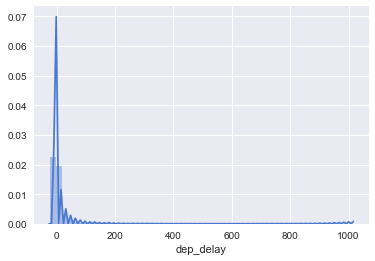

In [281]:
# Plot a histogram of the flights departure delayed for month 9 (September)
sns.set(color_codes=True)                    
sns.set_palette(sns.color_palette("muted"))

sns.distplot(df_nyc_flights[(df_nyc_flights['month']==9)]["dep_delay"].dropna());


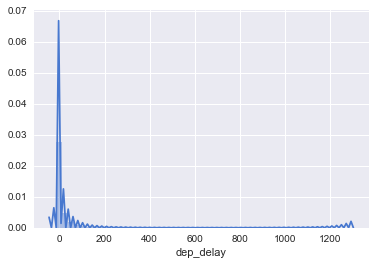

In [282]:
# Plot a histogram of compelte dataset on the data point 'flights departure delayed
sns.set(color_codes=True)                    
sns.set_palette(sns.color_palette("muted"))

sns.distplot(df_nyc_flights["dep_delay"].dropna());

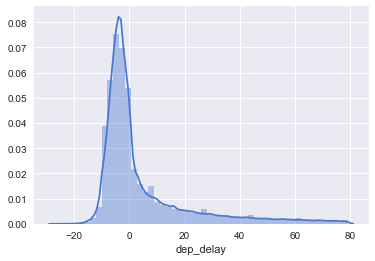

In [283]:
# Plot a histogram of the flights departure delayed time in range -30min to 80min
sns.set(color_codes=True)                    
sns.set_palette(sns.color_palette("muted"))

sns.distplot(df_nyc_flights[(df_nyc_flights['dep_delay']>-30)&(df_nyc_flights['dep_delay']<80)]["dep_delay"].dropna());

In [284]:
# find the data outlier percentage in the dataset for variable dep_delay
total_delay_count = df_nyc_flights["dep_delay"].count()
range_delay_count = df_nyc_flights[(df_nyc_flights['dep_delay']>-30)&(df_nyc_flights['dep_delay']<80)]["dep_delay"].count()

print("Total dataset records for departure delay - ", total_delay_count)
print("Total dataset records for departure delay range: -30 to +80 min - ", range_delay_count)
print("percentage of outliers - ", ((total_delay_count-range_delay_count)/total_delay_count)*100)

Total dataset records for departure delay -  328521
Total dataset records for departure delay range: -30 to +80 min -  309474
percentage of outliers -  5.797802880181176


In [285]:
# find the data outlier percentage in the dataset for variable dep_delay
total_delay_count = df_nyc_flights["arr_delay"].count()
range_delay_count = df_nyc_flights[(df_nyc_flights['arr_delay']>-30)&(df_nyc_flights['arr_delay']<80)]["arr_delay"].count()

print("Total dataset records for arrival delay - ", total_delay_count)
print("Total dataset records for arrival delay range: -30 to +80 min - ", range_delay_count)
print("percentage of outliers - ", ((total_delay_count-range_delay_count)/total_delay_count)*100)

Total dataset records for arrival delay -  327346
Total dataset records for arrival delay range: -30 to +80 min -  284689
percentage of outliers -  13.031165800101421


#### Data outliers observations
    -the dataset variable 'dep_delay' has 5.8% data as outliers
    -the dataset variable 'arr_delay' has 13% data as outliers

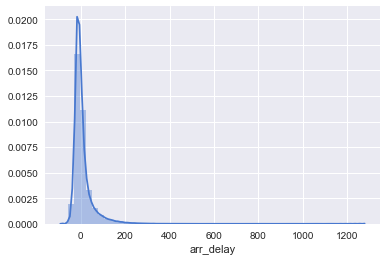

In [286]:
# Plot a histogram of compelte dataset on the data point 'flights arrival delayed
sns.set(color_codes=True)                    
sns.set_palette(sns.color_palette("muted"))

sns.distplot(df_nyc_flights["arr_delay"].dropna());

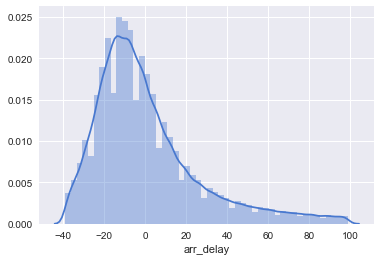

In [287]:
# Plot a histogram of the flights arrival delayed time in range -30min to 80min
sns.set(color_codes=True)                    
sns.set_palette(sns.color_palette("muted"))

sns.distplot(df_nyc_flights[(df_nyc_flights['arr_delay']>-40)&(df_nyc_flights['arr_delay']<100)]["arr_delay"].dropna());

#### Observations

- Taken two sample sets (monthwise) from the flight dataset, where the departure delays were observed in the range -30 to 1000+ (minutes). The data distribution patteren on the each sample was almost same and was also matching with complete dataset  


- The -ve data means flights departed/arrieved early the scheduled time, and the +ve data means the delay in the flight departure/arrival.


- The sample data shows positively skewed for departure/arrival data on range -30 to 80min, the mean of the delayed departure and delayed arrival data has been pulled on right side as there are less flights delayed.

<a id=section403></a>
### 4.3. Handling NaN data in the numberical columns
- From the section 4.1 missing data analysis, there are six variables with many missing values. 


- arr_delay __(2.800081%)__
- air_time __(2.800081%)__
- arr_time __(2.587180%)__
- dep_time __(2.451184%)__
- dep_delay __(2.451184%)__
- tailnum __(0.745896%)__


- looking at the percentage of NaN and efforts to impute them, it is recommanded to drop them.

In [288]:
# delete flight records having NaN in columns departure time/dealy and same for arrival time/delay. 
# there are aroud 8255 records
df_nyc_flights.dropna(inplace=True)

In [289]:
df_nyc_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 22 columns):
ID                327346 non-null int64
year              327346 non-null int64
month             327346 non-null int64
day               327346 non-null int64
dep_time          327346 non-null float64
sched_dep_time    327346 non-null int64
dep_delay         327346 non-null float64
arr_time          327346 non-null float64
sched_arr_time    327346 non-null int64
arr_delay         327346 non-null float64
carrier           327346 non-null object
flight            327346 non-null int64
tailnum           327346 non-null object
origin            327346 non-null object
dest              327346 non-null object
air_time          327346 non-null float64
distance          327346 non-null int64
hour              327346 non-null int64
minute            327346 non-null int64
time_hour         327346 non-null object
date              327346 non-null datetime64[ns]
month_year        327346 

In [290]:
# review the dataframe after cleaning the data, all NaN or null data should have been cleaned

total = df_nyc_flights.isnull().sum().sort_values(ascending=False)
percent = ((df_nyc_flights.isnull().sum()/df_nyc_flights.isnull().count())*100).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print(missing_data)

                Total  Percent
month_year          0      0.0
date                0      0.0
year                0      0.0
month               0      0.0
day                 0      0.0
dep_time            0      0.0
sched_dep_time      0      0.0
dep_delay           0      0.0
arr_time            0      0.0
sched_arr_time      0      0.0
arr_delay           0      0.0
carrier             0      0.0
flight              0      0.0
tailnum             0      0.0
origin              0      0.0
dest                0      0.0
air_time            0      0.0
distance            0      0.0
hour                0      0.0
minute              0      0.0
time_hour           0      0.0
ID                  0      0.0


__Missing Data__ - records with missing values in 5 fields are now cleaned

##### Observation

- as per above it looks month Aug, Oct, July and May has more than 28k flights departed from 3 airport - JFK, EWR, LGA
- while month Feb has the lowest departure. 


<a id=section404></a> 
### 4.4. Grouping
#### Flight Delay Distribution

The flight departure and arrival can be grouped based on the below data points,
- Airport (Origin)
- Flight Carrier
- Departure Month



In [291]:
# group the flight data monthwise for flight depature on time
df_delay_group0 = df_nyc_flights[df_nyc_flights['dep_delay']==0].groupby(['month'])['arr_delay'].agg(['count'])

# group the flight data monthwise for flight depature with delay
df_delay_group1 = df_nyc_flights[df_nyc_flights['dep_delay']>0].groupby(['month'])['arr_delay'].agg(['count'])

# group the flight data monthwise for flight depature before time
df_delay_group = df_nyc_flights[df_nyc_flights['dep_delay']<0].groupby(['month'])['arr_delay'].agg(['count'])

# merge the dataframe to form a single unit of depature data per month
df_merge = pd.merge(df_delay_group, df_delay_group1,how='inner', left_on='month', right_on='month')
df_dep_merge = pd.merge(df_merge, df_delay_group0,how='inner', left_on='month', right_on='month')

# rename the column name to user friendly name which would be used in the visualization of the data
df_dep_merge.rename(columns={'count_x':'Departed Early', 'count_y':'Departure Delayed', 'count':'Departure OnTime'},inplace=True)

In [292]:
# group the flight data monthwise for flight arrival on time
df_arr_delay_group0 = df_nyc_flights[df_nyc_flights['arr_delay']==0].groupby(['month'])['arr_delay'].agg(['count'])

# group the flight data monthwise for flight arrival with delay
df_arr_delay_group1 = df_nyc_flights[df_nyc_flights['arr_delay']>0].groupby(['month'])['arr_delay'].agg(['count'])

# group the flight data monthwise for flight arrived before time
df_arr_delay_group = df_nyc_flights[df_nyc_flights['arr_delay']<0].groupby(['month'])['arr_delay'].agg(['count'])

# merge the dataframe to form a single unit of arrival data per month
df_merge = pd.merge(df_arr_delay_group, df_arr_delay_group1,how='inner', left_on='month', right_on='month')
df_arr_merge = pd.merge(df_merge, df_arr_delay_group0,how='inner', left_on='month', right_on='month')

# rename the column name to user friendly name which would be used in the visualization of the data
df_arr_merge.rename(columns={'count_x':'Arrived Early', 'count_y':'Arrived Delayed', 'count':'Arrived OnTime'},inplace=True)

In [293]:
# consolidate departure and arrival data to plot the chart
df_merge = pd.merge(df_dep_merge, df_arr_merge,how='inner', left_on='month', right_on='month')

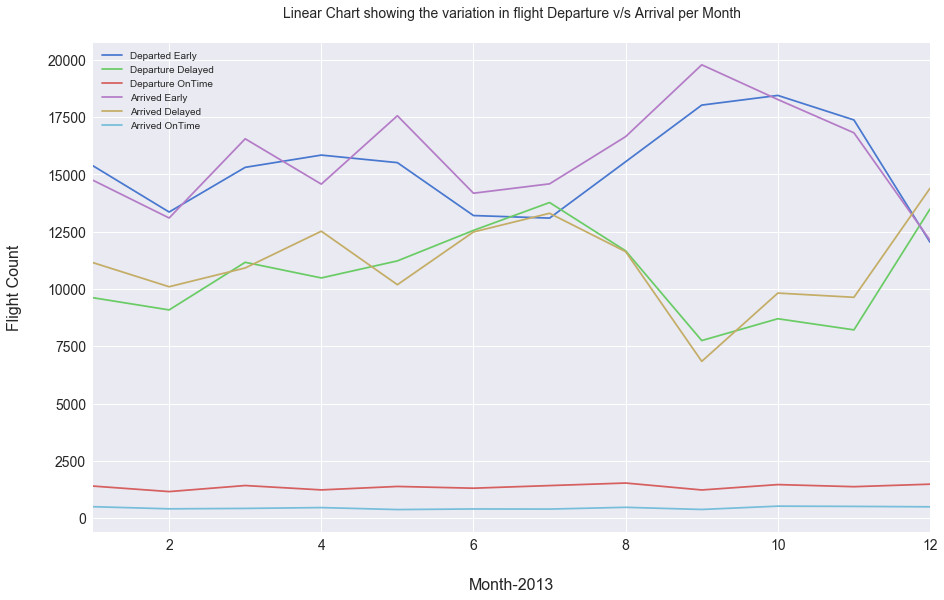

In [377]:
#mvalue=['Jan','Feb','MAR','Apr','May','Jun','Jul', 'Aug', 'Sept','Oct', 'Nov','Dec']

df_merge.groupby(['month'])['Departed Early'].mean().plot(kind='line', figsize=(15, 9), fontsize=14,)
df_merge.groupby(['month'])['Departure Delayed'].mean().plot(kind='line', figsize=(15, 9), fontsize=14)
df_merge.groupby(['month'])['Departure OnTime'].mean().plot(kind='line', figsize=(15, 9), fontsize=14)

df_merge.groupby(['month'])['Arrived Early'].mean().plot(kind='line', figsize=(15, 9), fontsize=14,)
df_merge.groupby(['month'])['Arrived Delayed'].mean().plot(kind='line', figsize=(15, 9), fontsize=14)
df_merge.groupby(['month'])['Arrived OnTime'].mean().plot(kind='line', figsize=(15, 9), fontsize=14)

plt.xlabel('Month-2013',fontsize=16,labelpad=25)
plt.ylabel('Flight Count',fontsize=16,labelpad=25)
plt.title('Linear Chart showing the variation in flight Departure v/s Arrival per Month', pad=25, fontsize=14)
plt.legend(['Departed Early', 'Departure Delayed', 'Departure OnTime', 'Arrived Early', 'Arrived Delayed',  'Arrived OnTime' ],fontsize=10)

plt.savefig('Variation_Departure_Arrival.png')

#### Observations


- There is a __low but almost steady count__ for flights __departed and arrived on time through out the year__
- Most __departure delayed__ months were __Dec, July__ same for arrvial
- Months where flights were __departed and arrieved early__ are __Sept, Oct__


### Flights distribution against carrier

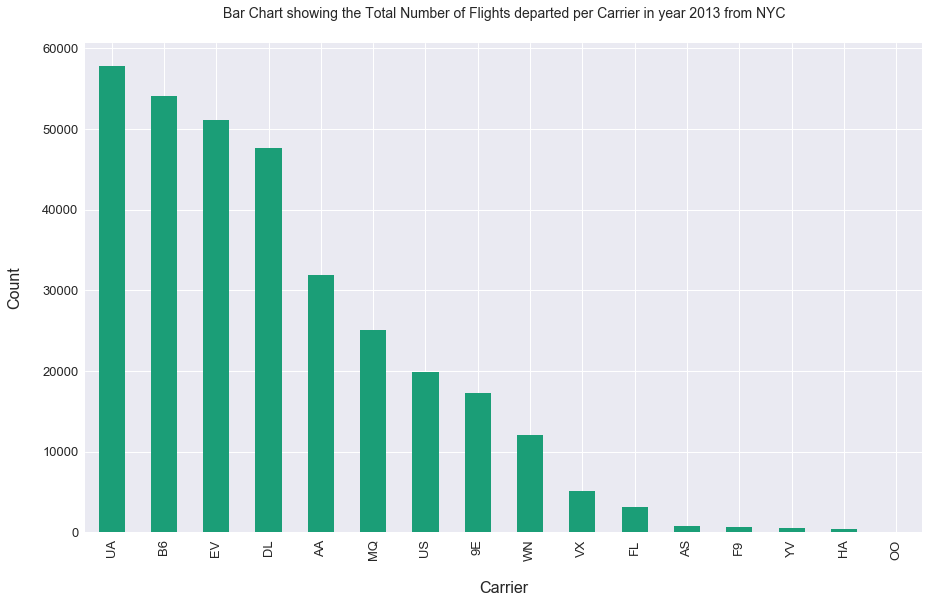

In [424]:
# Using pandas plot.bar function to plot the bar chart for the Category column of the dataframe df_mcd.

df_nyc_flights['carrier'].value_counts().plot.bar(figsize=(15,9), colormap='Dark2', fontsize=13)

# Using matplotlib to add labels and title to the plot. 
# Pandas and matplotlib are linked with each other in the notebook by the use of this line in the Imports: %matplotlib inline

plt.xlabel('Carrier',fontsize=16,labelpad=20)
plt.ylabel('Count',fontsize=16,labelpad=20)
plt.title('Bar Chart showing the Total Number of Flights departed per Carrier in year 2013 from NYC', pad=25, fontsize=14)

# In order to save your plot into an image on your system, use the following command.
# The image will be saved in the directory of this notebook.

plt.savefig('Flight_Carrier_Distribution.png')

##### Observations

- Total 16 carriers operated from NYC

- Top 3 flight carriers took off more than 50k times each in the year 2013
    - UA    58,665 (approx. 160 flights per day)
    - B6    54,635 (approx. 149 flights per day)
    - EV    54,173 (approx. 148 flights per day)

- The bottom 2 flight carrier were operated less than 1 per day
    - HA      342
    - OO       32

In [296]:
df_nyc_flights[df_nyc_flights['dep_delay']==0]['carrier'].value_counts()

UA    3392
DL    2859
B6    2765
EV    1654
AA    1601
MQ    1300
WN     983
US     637
9E     631
VX     411
FL     129
F9      44
AS      28
YV      18
HA      14
Name: carrier, dtype: int64

In [363]:
"""
df_nyc_flights['carrier'].unique()
carrier_names = {'UA':"United Airlines, Inc.", 'AA':"American Airlines Inc.", 'B6':"Jetblue Airways Corporation", 
                 'DL':"Delta Air Lines, Inc.", 'EV':"ExpressJet Airlines, Inc.", 'MQ':"Envoy Air Inc.", 
                 'US':"Puerto Rico International Airlines Inc.", 'WN':"Southwest Airlines Co.", 'VX':"Virgin America Inc.", 
                 'FL':"", 'AS':"Alaska Airlines Inc.", '9E':"Endeavor Air", 'F9':"Frontier Airlines, Inc.", 
                 'HA':"Hawaiian Airlines, Inc.", 'YV':"Mesa Airlines, Inc.", 'OO':"SkyWest Airlines"}
df_nyc_flights['day'][df_nyc_flights['month'] == 8].value_counts()
"""

'\ndf_nyc_flights[\'carrier\'].unique()\ncarrier_names = {\'UA\':"United Airlines, Inc.", \'AA\':"American Airlines Inc.", \'B6\':"Jetblue Airways Corporation", \n                 \'DL\':"Delta Air Lines, Inc.", \'EV\':"ExpressJet Airlines, Inc.", \'MQ\':"Envoy Air Inc.", \n                 \'US\':"Puerto Rico International Airlines Inc.", \'WN\':"Southwest Airlines Co.", \'VX\':"Virgin America Inc.", \n                 \'FL\':"", \'AS\':"Alaska Airlines Inc.", \'9E\':"Endeavor Air", \'F9\':"Frontier Airlines, Inc.", \n                 \'HA\':"Hawaiian Airlines, Inc.", \'YV\':"Mesa Airlines, Inc.", \'OO\':"SkyWest Airlines"}\ndf_nyc_flights[\'day\'][df_nyc_flights[\'month\'] == 8].value_counts()\n'

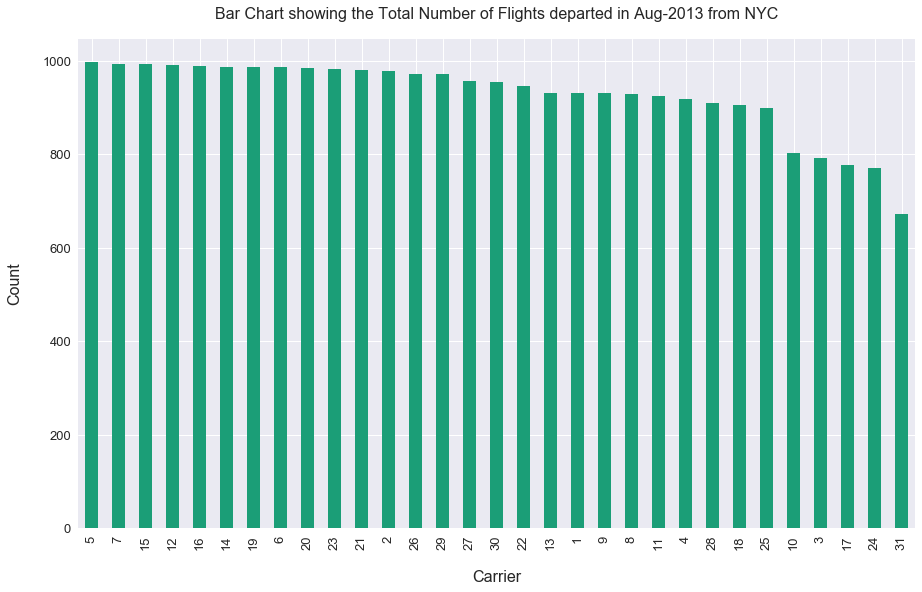

In [396]:
# departure distribution in most busy month Aug-2013
df_nyc_flights['day'][df_nyc_flights['month'] == 8].value_counts().plot.bar(figsize=(15,9), colormap='Dark2', fontsize=13)

plt.xlabel('Carrier',fontsize=16,labelpad=20)
plt.ylabel('Count',fontsize=16,labelpad=20)
plt.title('Bar Chart showing the Total Number of Flights departed in Aug-2013 from NYC',fontsize=16,pad=20)

plt.savefig('Flights_Departed_Aug_2013.png')

#### Question that comes up:

- Flight departed with the minimum and maximum delay a flight experienced 
- how flight delay is related to the total flights departed on a day or in a month and what could be the relation for a airport with more departures

In [299]:
df_nyc_flights[df_nyc_flights["dep_delay"]==df_nyc_flights.dep_delay.max()]

,ID,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,date,month_year
7072,7073,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983,9,0,09-01-2013 09:00,2013-01-09,Jan-13


In [300]:
df_nyc_flights[(df_nyc_flights["dep_delay"]>0)&(df_nyc_flights["dep_delay"]<2)]

,ID,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,date,month_year
19,20,2013,1,1,601.0,600,1.0,844.0,850,-6.0,B6,343,N644JB,EWR,PBI,147.0,1023,6,0,01-01-2013 06:00,2013-01-01,Jan-13
49,50,2013,1,1,646.0,645,1.0,910.0,916,-6.0,UA,883,N569UA,LGA,DEN,243.0,1620,6,45,01-01-2013 06:00,2013-01-01,Jan-13
50,51,2013,1,1,646.0,645,1.0,1023.0,1030,-7.0,UA,1496,N38727,EWR,SNA,380.0,2434,6,45,01-01-2013 06:00,2013-01-01,Jan-13
68,69,2013,1,1,701.0,700,1.0,1123.0,1154,-31.0,UA,1203,N77296,EWR,SJU,188.0,1608,7,0,01-01-2013 07:00,2013-01-01,Jan-13
128,129,2013,1,1,821.0,820,1.0,1153.0,1129,24.0,B6,181,N521JB,JFK,SAN,354.0,2446,8,20,01-01-2013 08:00,2013-01-01,Jan-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336486,336487,2013,9,30,1701.0,1700,1.0,1943.0,2018,-35.0,DL,95,N709TW,JFK,LAX,301.0,2475,17,0,30-09-2013 17:00,2013-09-30,Sep-13
336488,336489,2013,9,30,1701.0,1700,1.0,1820.0,1838,-18.0,UA,1048,N27213,LGA,ORD,107.0,733,17,0,30-09-2013 17:00,2013-09-30,Sep-13
336507,336508,2013,9,30,1716.0,1715,1.0,1907.0,1905,2.0,AA,345,N543AA,LGA,ORD,109.0,733,17,15,30-09-2013 17:00,2013-09-30,Sep-13
336581,336582,2013,9,30,1826.0,1825,1.0,2040.0,2037,3.0,DL,2044,N324US,JFK,DTW,80.0,509,18,25,30-09-2013 18:00,2013-09-30,Sep-13


#### Observations

- There is only flight with __max delay__ i.e. __1301 minutes__ which is 21 hrs. almost one day delay, destination was __Honolulu__. Distance is 4983 miles Further investigation can be performed with some external data/search on official data source


    - below information obtained from Google search
            The flight time from John F. Kennedy International Airport to Honolulu International Airport is:
            In-air flight time: 10 hours, 9 minutes.
            From gate to gate: 10 hours, 35 minutes.
            Constant 500 mph: 9 hours, 58 minutes.


- The minimum delay could be less than 2 min, the observations indicates 8026 flights delayed with 1 minute through out the year


#### The top 5 most delayed routes regardless of distance

In [382]:
df_delay_group0 = df_nyc_flights[df_nyc_flights['dep_delay']>0].groupby(['origin','dest'])['dep_delay'].agg(['count'])

route_list = df_delay_group0[df_delay_group0['count'] >2600 ]['count'].index.values.tolist()
del_count_list = df_delay_group0[df_delay_group0['count'] >2600 ]['count'].values.tolist()
df_top_delay_route = pd.DataFrame(route_list, columns=['origin','dest'])
df_top_delay_route['count']=del_count_list
df_top_delay_route.sort_values(by='count',ascending=False,inplace=True)


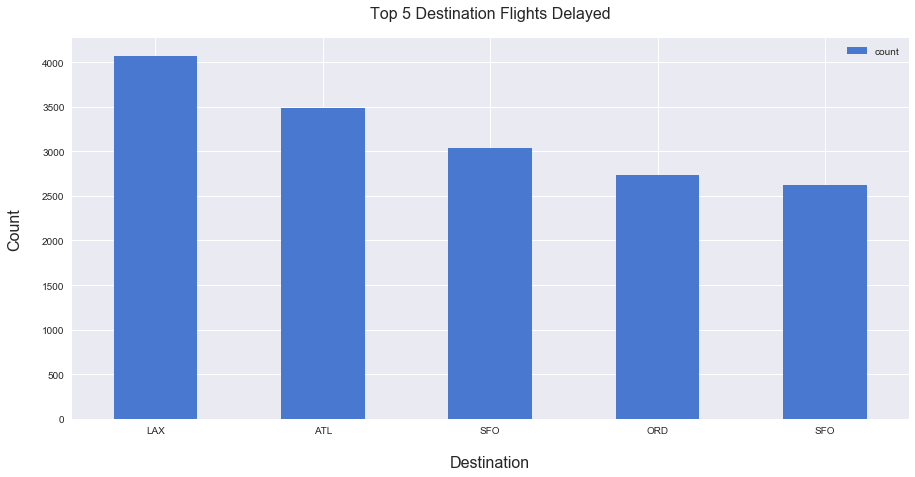

In [439]:
ax = df_top_delay_route.plot.bar(x='dest', y='count', figsize=(15, 7), rot=0)


plt.xlabel('Destination',fontsize=16,labelpad=20)
plt.ylabel('Count',fontsize=16,labelpad=20)
plt.title('Top 5 Destination Flights Delayed',fontsize=16,pad=20)

plt.savefig('Top_5_Dest_Flight_Delayed.png')

#### Observations

- Top five destinations where flight delay count was more than 2500 during year 2013 were as below
    - LAX (2475 miles)
    - ATL (762 miles)
    - SFO (733 from JKF (New York) airport)
    - ORD (2565 )
    - SFO (from EWR (New JERSEY) airport)

#### Analyze the flights departure on longest and shortest route

In [303]:
long_dest = df_nyc_flights[df_nyc_flights["distance"]>2500]['dest'].unique()
short_dest = df_nyc_flights[df_nyc_flights["distance"]<170]['dest'].unique()

In [304]:
# find out the longest route and count number of departure delay on it
# apply group by on the destination with distance more than 2500 and count departure delays

df_delay_group0 = df_nyc_flights[(df_nyc_flights['dep_delay']>0)&(df_nyc_flights['dest'].isin(long_dest))&(df_nyc_flights["distance"]>2500)].groupby(['dest'])['dep_delay'].agg(['count'])

# form a new dataframe 
route_list = df_delay_group0['count'].index.values.tolist()
del_count_lst = df_delay_group0['count'].values.tolist()

df_top_delay_route = pd.DataFrame(route_list, columns=['dest'])
df_top_delay_route['count']=del_count_lst

df_top_delay_route.sort_values(by='count',ascending=False,inplace=True)
#SFO - San Francisco International Airport
df_top_delay_route

,dest,count
3,SFO,5660
1,HNL,280
5,SMF,146
4,SJC,136
2,OAK,135
0,ANC,6


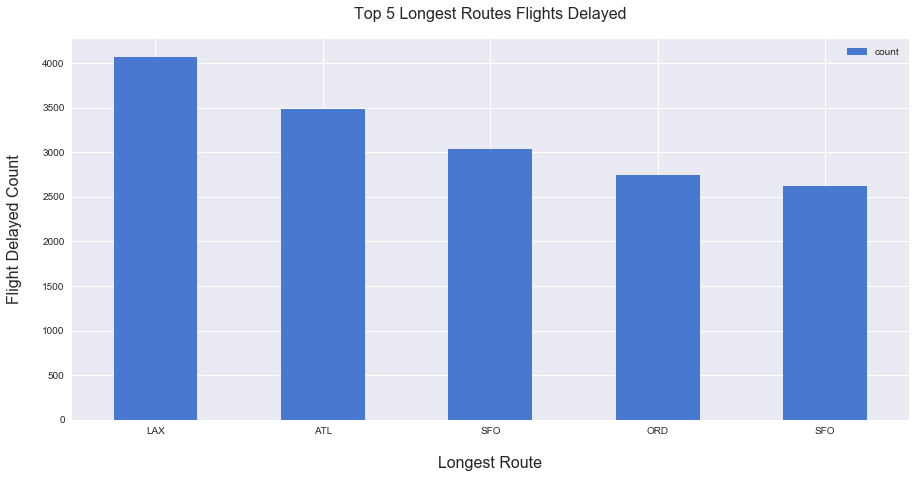

In [438]:
ax = df_top_delay_route.plot.bar(x='dest', y='count', figsize=(15, 7), rot=0)

plt.xlabel('Longest Route',fontsize=16, labelpad=20)
plt.ylabel('Flight Delayed Count',fontsize=16, labelpad=20)
plt.title('Top 5 Longest Routes Flights Delayed',fontsize=16,pad=20)

plt.savefig('Top_5_Longest_Route_Flight_Delayed.png')


- find more details on destination ANC 

In [306]:
# find out the shortest route and count number of departure delay on it
# apply group by on the destination with distance more than 2500 and count departure delays

df_delay_group0 = df_nyc_flights[(df_nyc_flights['dep_delay']>0)&(df_nyc_flights['dest'].isin(short_dest))&(df_nyc_flights["distance"]<170)].groupby(['dest'])['dep_delay'].agg(['count'])
route_list = df_delay_group0['count'].index.values.tolist()
del_count_lst = df_delay_group0['count'].values.tolist()

df_top_delay_route = pd.DataFrame(route_list, columns=['dest'])
df_top_delay_route['count']=del_count_lst

df_top_delay_route.sort_values(by='count',ascending=False,inplace=True)

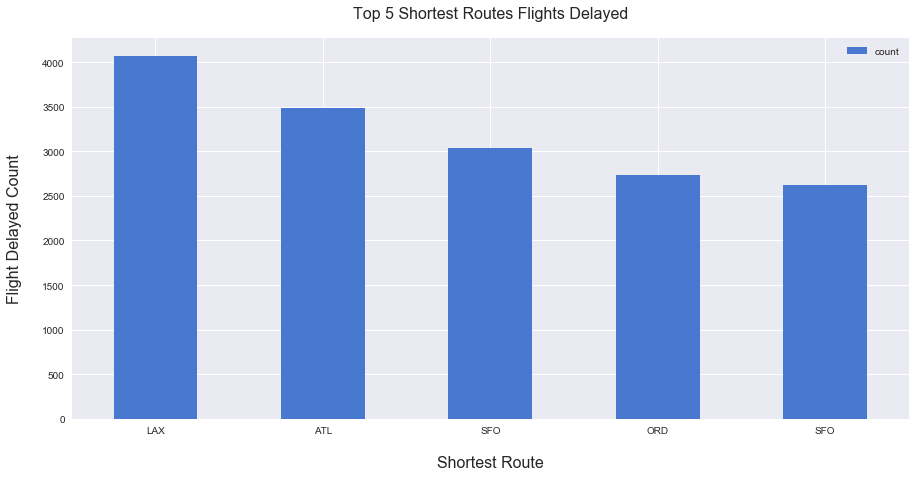

In [398]:
ax = df_top_delay_route.plot.bar(x='dest', y='count', figsize=(15, 7), rot=0)

plt.xlabel('Shortest Route',fontsize=16,labelpad=20)
plt.ylabel('Flight Delayed Count',fontsize=16,labelpad=20)
plt.title('Top 5 Shortest Routes Flights Delayed',fontsize=16,pad=20)

plt.savefig('Top_5_Shortest_Route_Flight_Delayed.png')


#### Correlation of Features

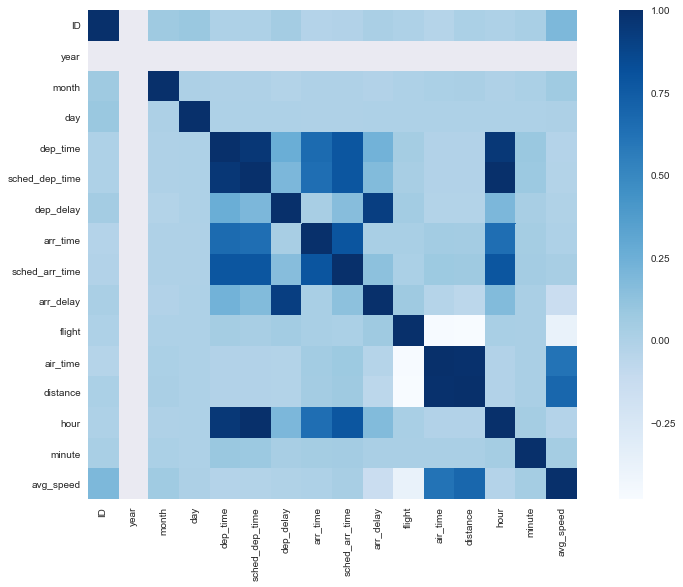

<Figure size 432x288 with 0 Axes>

In [393]:
## Find the correlation among the dataset variable

features_correlation = df_nyc_flights.corr()
plt.figure(figsize=(15,9))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')

plt.show()

plt.savefig('NYC_Flight_Data_Correlation.png')

- Correlation Observations - departure time and scheduled departure time, air time and distance, departure delay and arrival delay has high +ve correlation

<a id=section5></a> 
### 5. Identify patterns in the data

<a id=section501></a> 
### 5.1. Flight Departed per Month

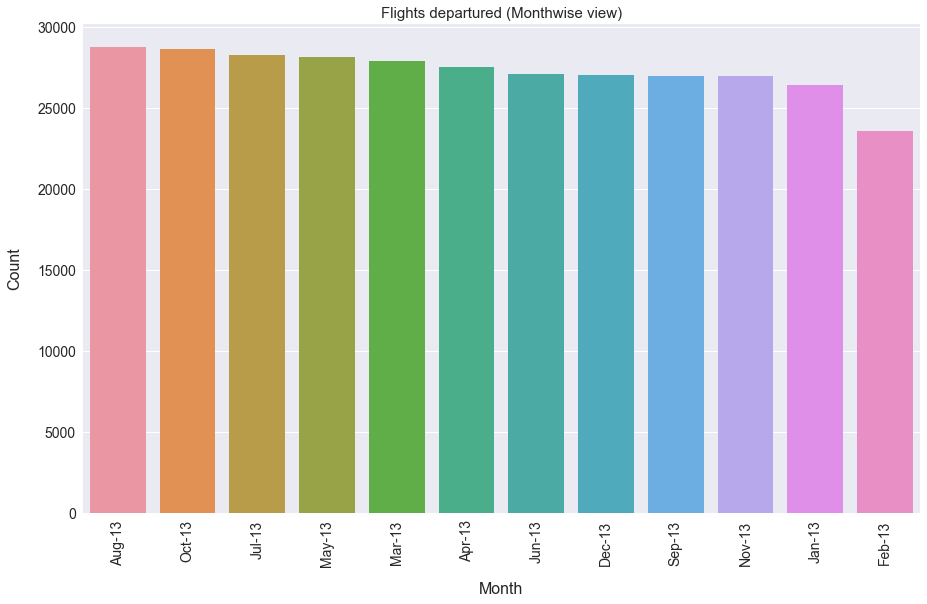

In [394]:
#Plot the bar chart for the flights departed every month

from collections import Counter
carrier_count = Counter(df_nyc_flights['month_year'].sort_values(ascending=True).tolist()).most_common(12)

# object has monthwise departure count
#carrier_count

country_idx = [country[0] for country in carrier_count]
country_val = [country[1] for country in carrier_count]
fig,ax = plt.subplots(figsize=(15,9))

sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Flights departured (Monthwise view)',fontsize=15)
plt.xlabel('Month', fontsize=16, labelpad=15)
plt.ylabel('Count',  fontsize=16, labelpad=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ticks = plt.setp(ax.get_xticklabels(), rotation=90)

plt.savefig('Flight_Departure_Monthly_View.png')


In [310]:
carrier_count.sort(key=lambda x: x[1], reverse=True)
carrier_count

[('Aug-13', 28756),
 ('Oct-13', 28618),
 ('Jul-13', 28293),
 ('May-13', 28128),
 ('Mar-13', 27902),
 ('Apr-13', 27564),
 ('Jun-13', 27075),
 ('Dec-13', 27020),
 ('Sep-13', 27010),
 ('Nov-13', 26971),
 ('Jan-13', 26398),
 ('Feb-13', 23611)]

#### Observation

 - Month May, July, Aug and Oct shows more delayed flightes reasons could be holiday season

    1. LGA shows more flights in month of Oct and less in Feb
    2. JFK shows more flights in month of Aug and less in Feb
    3. EWR shows more flights in month of May and less in Feb

<a id=section502></a> 
### 5.2. Departure Delay (mean) v. Month of the year

Whether an employee is seeking treatment for a mental health condition appears to be correlated with their knowledge of their employer's mental health benefits.


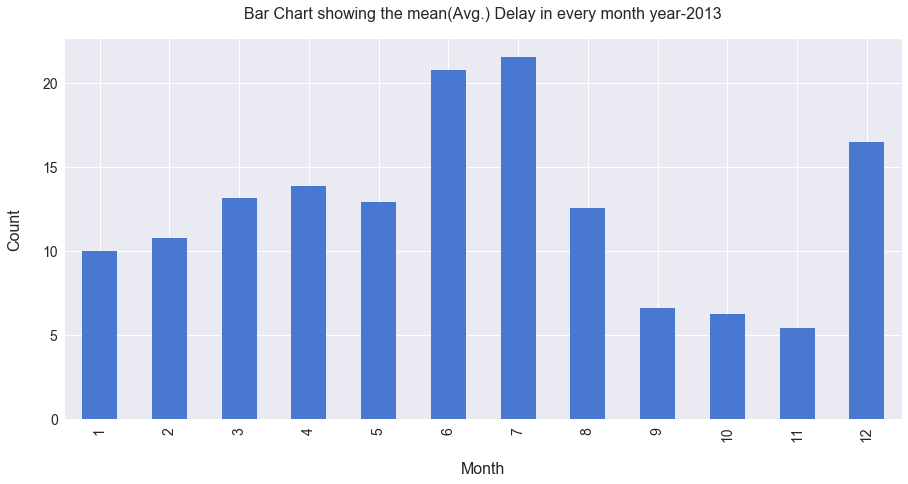

In [403]:
# departure distribution in most busy month Aug-2013
df_nyc_flights.groupby(['month'])['dep_delay'].mean().plot(kind='bar', figsize=(15, 7), fontsize=14,)

plt.xlabel('Month',fontsize=16,labelpad=20,)
plt.ylabel('Count',fontsize=16,labelpad=20)
plt.title('Bar Chart showing the mean(Avg.) Delay in every month year-2013',fontsize=16,pad=20)

plt.savefig('Avg_Dep_Delay_Monthly.png')

### Observation

- The average (mean) delay during month June, July was high ( >20 minutes) while month Dec recorded at position 3 with Avg. delay above 15 min. The primary  cause for delay could be the holiday season in USA (Summer Vacation and x-Max/New Year)

<a id=section503></a> 
### 5.3. Number of flights on a route (Origin - Destination)

In [312]:
# group the flight count data for route i.e. for a origin-destination 
df_arr_delay_group0 = df_nyc_flights.groupby(['origin','dest'])['flight'].agg(['count'])

In [405]:
# print the total routes and route operating more flights
print("Total routes", df_arr_delay_group0.count())
df_arr_delay_group0[df_arr_delay_group0['count']>5000].sort_values(by='count', ascending=False)

Total routes count    223
dtype: int64


count
origin dest       
JFK    LAX   11159
LGA    ATL   10041
       ORD    8507
JFK    SFO    8109
LGA    CLT    5961
EWR    ORD    5828
JFK    BOS    5773
LGA    MIA    5702
JFK    MCO    5429
EWR    BOS    5247
       SFO    5064

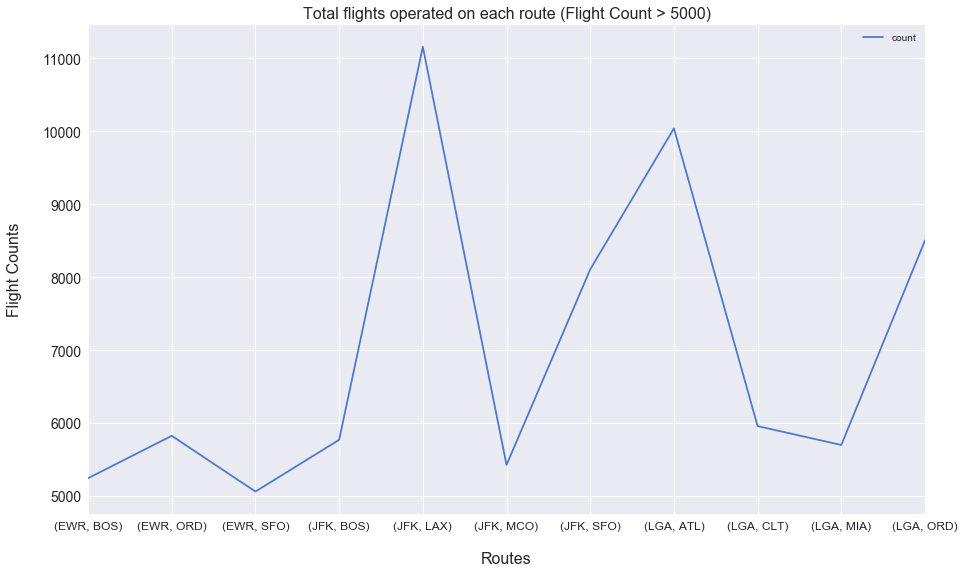

In [418]:
# plot the graph to display flight count on top routes with flight count more than 5000
fig, ax = plt.subplots(figsize=(15,9))

ax.set_xticks(np.arange(len(df_arr_delay_group0.index.values)))
ax.set_xticklabels(df_arr_delay_group0.index.values)

df_arr_delay_group0[df_arr_delay_group0['count']>5000].plot(ax=ax)
ax.set_xlabel('Routes',fontsize=16, labelpad=20)

ax.set_ylabel('Flight Counts',fontsize=16, labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
ax.title.set_text('Total flights operated on each route (Flight Count > 5000)')
ax.title.set_fontsize(16)

plt.savefig('Flight_Count_on_Route.png')

### Observation

- The flights were operated on total __223 routes__ from __JFK, EWR, LGA airports__
- There were __11 routes__ where more than __5000 flights__ on each route were operated in a year
- The top 2 routes are __JFK-LAX :11159 flights__ and __LGA-ATL : 10041 flights__

<a id=section504></a> 
### 5.4. Average speed of a flight v. top Fastest speed flights

In [315]:
df_nyc_flights['avg_speed']=df_nyc_flights['distance']/(df_nyc_flights['air_time']/60) # avg speed miles per hour
df_nyc_flights['avg_speed']=df_nyc_flights.avg_speed.astype(int)

In [316]:
print("Max speed of flight : ", df_nyc_flights['avg_speed'].max(),"mph")
df_nyc_flights[df_nyc_flights["avg_speed"]==df_nyc_flights.avg_speed.max()]

Max speed of flight :  703 mph


,ID,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,date,month_year,avg_speed
216447,216448,2013,5,25,1709.0,1700,9.0,1923.0,1937,-14.0,DL,1499,N666DN,LGA,ATL,65.0,762,17,0,25-05-2013 17:00,2013-05-25,May-13,703


In [317]:
print("Min. speed of flight : ", df_nyc_flights['avg_speed'].min(),"mph")
df_nyc_flights[df_nyc_flights["avg_speed"]==df_nyc_flights.avg_speed.min()]

Min. speed of flight :  76 mph


,ID,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,date,month_year,avg_speed
24098,24099,2013,1,28,1917.0,1825,52.0,2118.0,1935,103.0,US,1860,N755US,LGA,PHL,75.0,96,18,25,28-01-2013 18:00,2013-01-28,Jan-13,76


In [318]:
df_nyc_flights[(df_nyc_flights["origin"]=='LGA')&(df_nyc_flights["dest"]=='ATL')]['avg_speed'].mean()

404.97281147296087

In [319]:
df_nyc_flights[(df_nyc_flights["origin"]=='LGA')&(df_nyc_flights["dest"]=='PHL')]['avg_speed'].mean()

159.29264214046822

Text(0.5, 1.0, 'Scatter plot showing the variation of Average Speed with Distance between Origin-Destination')

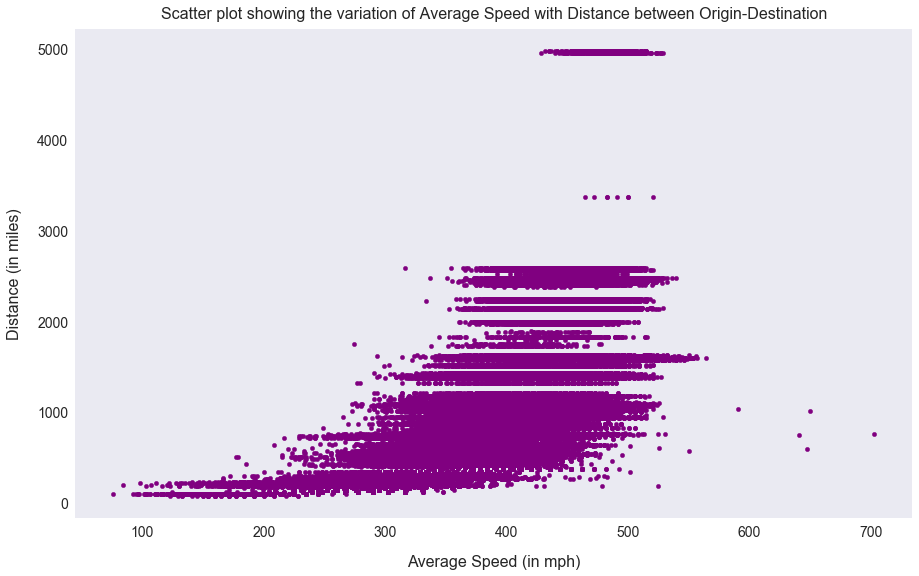

In [400]:
# Using pandas plot function to plot the scatter plot for the Energy and Carbohydrates columns.
# Using the kind='scatter' to plot a scatter plot.

df_nyc_flights.plot(kind='scatter', x='avg_speed', y='distance', figsize=(15, 9), color='purple', grid=False)
plt.xlabel('Average Speed (in mph)',fontsize=16, labelpad=15)
plt.ylabel('Distance (in miles)',fontsize=16, labelpad=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('Scatter plot showing the variation of Average Speed with Distance between Origin-Destination',fontsize=16, pad=10)

plt.savefig('Scatter_Plot_Speed_Distance.png')

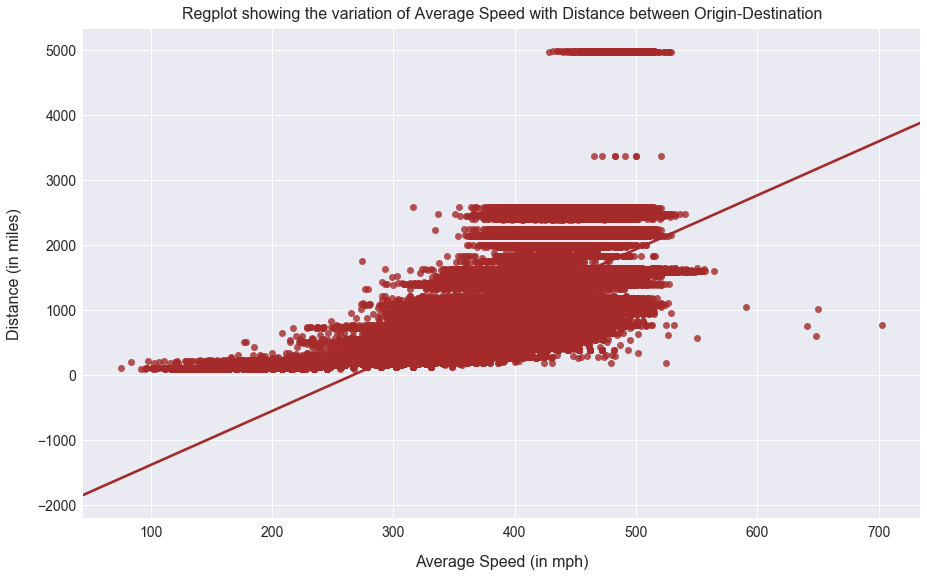

In [420]:
plt.figure(figsize=(15,9))

sns.regplot(data=df_nyc_flights, x='avg_speed', y='distance', color='brown')
plt.xlabel('Average Speed (in mph)',fontsize=16, labelpad=15)
plt.ylabel('Distance (in miles)',fontsize=16, labelpad=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('Regplot showing the variation of Average Speed with Distance between Origin-Destination',fontsize=16, pad=10)
plt.savefig('Regplot_Speed_Distance.png')

### Observation
- The scatter plot and Regplot shows positive strong correlation between average speed of a flight againt the distance been covered

<a id=section505></a> 
### 5.5. Monthly distribution of departure delay count per Flight carrier 

In [347]:
# carrier, month, delay
df_delay_group0 = df_nyc_flights[df_nyc_flights['dep_delay']>0].groupby(['month','carrier'])['dep_delay'].agg(["mean"])

pvtable = pd.pivot_table(df_delay_group0, values='mean', index='carrier', columns='month' )


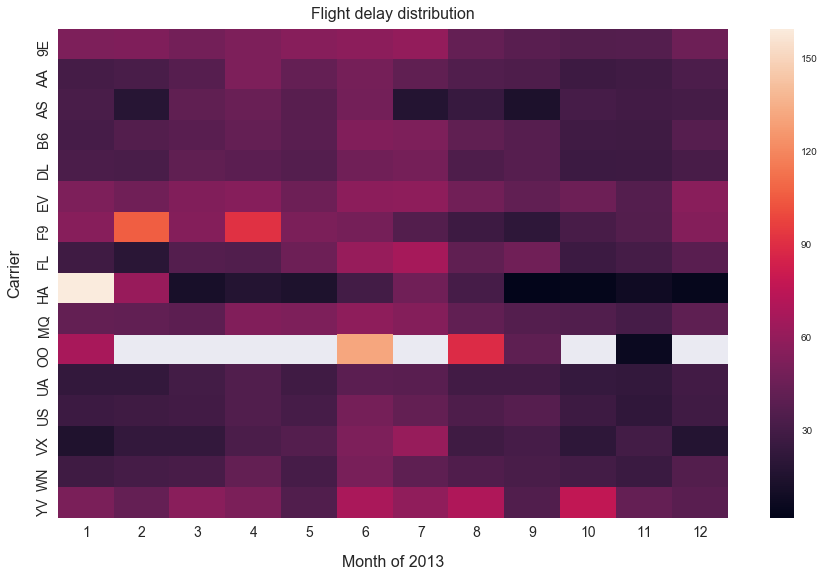

In [421]:
plt.figure(figsize=(15, 9))

sns.heatmap(pvtable)

plt.xlabel('Month of 2013',fontsize=16, labelpad=15)
plt.ylabel('Carrier',fontsize=16, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Flight delay distribution', fontsize=16, pad=10)

plt.savefig('HeatMap_Flight_Delay_Distribution.png')

### Observation
- Flight Carrier __HA__ shows departure delay time at max. in month of Jan, however rest of the year this carrier shown much better performance on departure i.e. departure delay time too short
- Flight Carrier __UA__ shows more __consistant__ compared with other carrier on the __low departure delay time__
- Flight Carrier __OO operated only 5 months__ during the year 2013. This Carrier contributing in high departure delay time (for 2013) in month of June
- The Maximum departures were seen in June, July and above heatmap shows high departure delay during the same period, despite these facts Carrier __AS__ shown __better performance on departure during month of July-2013__

<a id=section506></a> 
## 5.6. Average Departure delay v. Average Arrival delay (Monthwise)

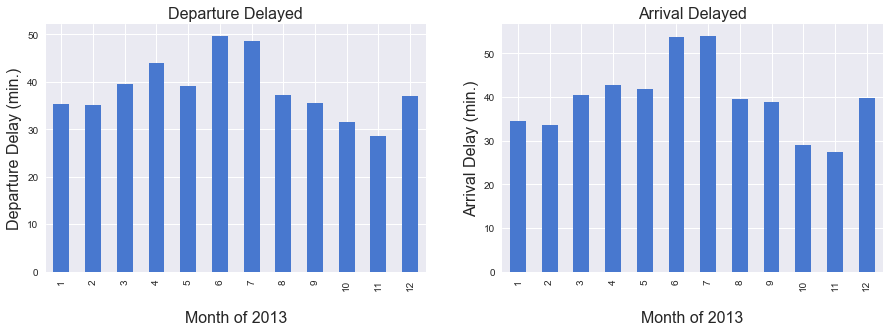

<Figure size 432x288 with 0 Axes>

In [422]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

df_nyc_flights[df_nyc_flights['dep_delay']>0].groupby(['month'])['dep_delay'].mean().plot.bar(ax=ax1)
df_nyc_flights[df_nyc_flights['arr_delay']>0].groupby(['month'])['arr_delay'].mean().plot.bar(ax=ax2)


ax1.set_xlabel('Month of 2013',fontsize=16, labelpad=20)
ax1.set_ylabel('Departure Delay (min.)',fontsize=16, labelpad=5)
ax1.title.set_text('Departure Delayed')
ax1.title.set_fontsize(16)

ax2.set_xlabel('Month of 2013',fontsize=16, labelpad=20)
ax2.set_ylabel('Arrival Delay (min.)',fontsize=16, labelpad=5)
ax2.title.set_text('Arrival Delayed')
ax2.title.set_fontsize(16)

plt.show()
plt.savefig('Mapping_Avg_Delay_Departure_Arrival.png')

### Observation
- The maximum delays on departure and arrival are occured in momthe of June-July 2013
- In general the delay on departure are directly proportional to delay at arrival

<a id=section6></a>
### 6. Analysis through questions

<a id=section601></a> 
#### 6.1.  Flight by airport(origin) location?

Flights operated per Airport

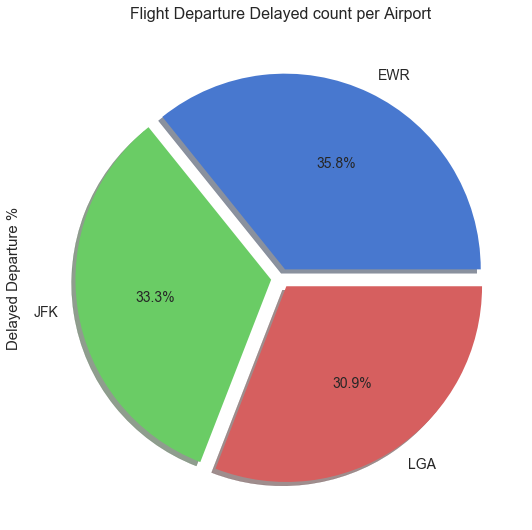

<Figure size 432x288 with 0 Axes>

In [575]:
plt.figure(figsize=(15,9))

# group the departure delay count airport wise
df_nyc_flights.groupby(['origin'])['dep_delay'].count().plot.pie(explode=[0.05,0.05,0.05], autopct='%1.1f%%',shadow=True, textprops={'fontsize': 14})

plt.ylabel('Delayed Departure %', fontsize=15, labelpad=15)

plt.yticks(fontsize=13)

plt.title('Flight Departure Delayed count per Airport', fontsize=16, pad=15)

plt.show()

plt.savefig('Air_Traffic_Per_Airport.png')

In [571]:
df_nyc_flights.groupby(['origin'])['dep_delay'].count()

origin
EWR    117127
JFK    109079
LGA    101140
Name: dep_delay, dtype: int64

<a id=section602></a> 
#### 6.1.1. Which Airport has observed most departure delays?

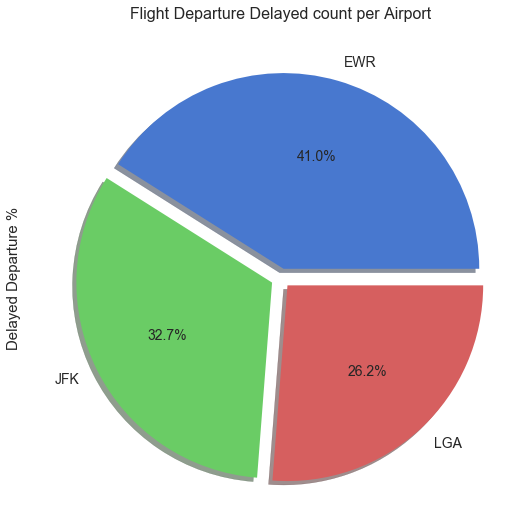

<Figure size 432x288 with 0 Axes>

In [574]:
plt.figure(figsize=(15,9))

# group the departure delay count airport wise
df_nyc_flights[df_nyc_flights['dep_delay']>0].groupby(['origin'])['dep_delay'].count().plot.pie(explode=[0.05,0.05,0.05], autopct='%1.1f%%',shadow=True, textprops={'fontsize': 14})


plt.ylabel('Delayed Departure %', fontsize=15, labelpad=15)

plt.yticks(fontsize=13)

plt.title('Flight Departure Delayed count per Airport', fontsize=16, pad=15)

plt.show()

plt.savefig('Delay_Departure_Per_Airport.png')


#### Observation

As from the above plot it can be seen that __US__ contributed the most with __751 respondents__ and now further exploring the states of US

<a id=section603></a> 
#### 6.1.2. Which flight Carrier contributes the most on delay?

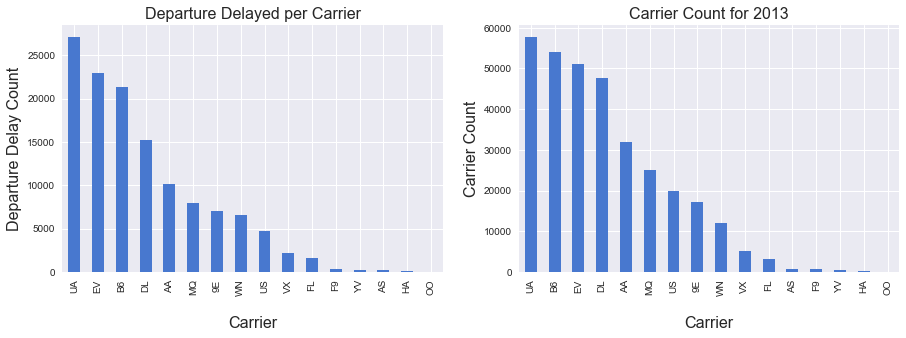

<Figure size 432x288 with 0 Axes>

In [442]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# group the departure delay count airport wise

df_nyc_flights[df_nyc_flights['dep_delay']>0].groupby(['carrier'])['dep_delay'].count().sort_values(ascending=False).plot.bar(ax=ax1)
df_nyc_flights['carrier'].value_counts().plot.bar(ax=ax2)


ax1.set_xlabel('Carrier',fontsize=16, labelpad=20)
ax1.set_ylabel('Departure Delay Count',fontsize=16, labelpad=5)
ax1.title.set_text('Departure Delayed per Carrier')
ax1.title.set_fontsize(16)

ax2.set_xlabel('Carrier',fontsize=16, labelpad=20)
ax2.set_ylabel('Carrier Count',fontsize=16, labelpad=5)
ax2.title.set_text('Carrier Count for 2013')
ax2.title.set_fontsize(16)

plt.show()
plt.savefig('Mapping_Avg_Delay_Departure_Arrival.png')

#### Observation

- The above chart shows carrier __UA (United Airline)__ flights operated more during year 2013 and has seen most delayed departure 
- In general the flight departure delays are directly corresponding to the count of flight carrier

<a id=section605></a> 
#### 6.1.3. What is the count and percentage of departure early but Arrival Delayed - the top 3 carriers?

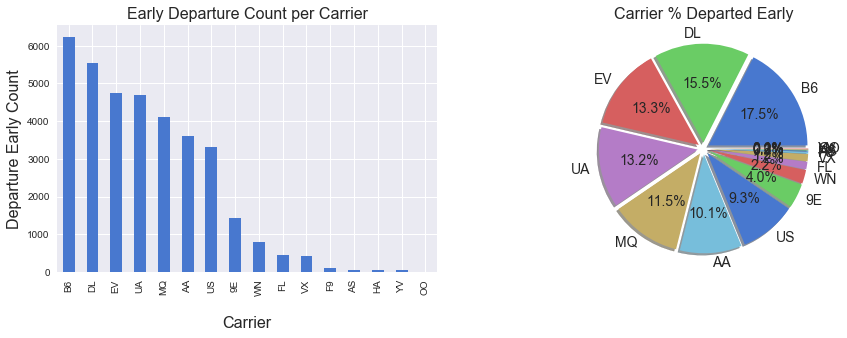

<Figure size 432x288 with 0 Axes>

In [495]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# group the departure delay count airport wise

expld = [0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06]

df_nyc_flights[(df_nyc_flights['dep_delay']<0)&(df_nyc_flights['arr_delay']>0)].groupby(['carrier'])['dep_delay'].count().sort_values(ascending=False).plot.bar(ax=ax1)
df_nyc_flights[(df_nyc_flights['dep_delay']<0)&(df_nyc_flights['arr_delay']>0)].groupby(['carrier'])['dep_delay'].count().sort_values(ascending=False).plot.pie(explode=expld, ax=ax2, autopct='%1.1f%%',shadow=True, textprops={'fontsize': 14})


ax1.set_xlabel('Carrier',fontsize=16, labelpad=20)
ax1.set_ylabel('Departure Early Count',fontsize=16, labelpad=5)
ax1.title.set_text('Early Departure Count per Carrier')
ax1.title.set_fontsize(16)

ax2.set_ylabel('',fontsize=16, labelpad=5)
ax2.title.set_text('Carrier % Departed Early')
ax2.title.set_fontsize(16)


plt.show()
plt.savefig('Mapping_Early_Departure_Delayed_Arrival.png')

The top 3 Carriers which were departed before schedule departure but Arrival was delayed were 

- __DL - Delta Air Lines__
- __UA - United Airline__
- __EV - ExpressJet Airlines, Inc.__

<a id=section606></a> 
#### 6.1.4. What is the count and percentage of Departure Delayed but Arrived Early - the top 3 carriers?

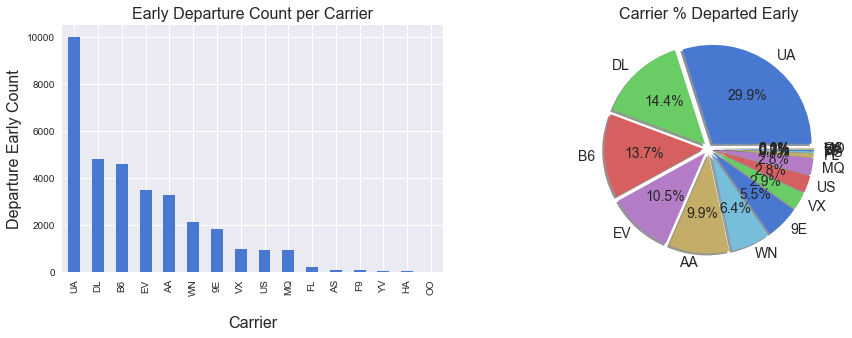

<Figure size 432x288 with 0 Axes>

In [496]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# group the departure delay count airport wise

expld = [0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06]

df_nyc_flights[(df_nyc_flights['dep_delay']>0)&(df_nyc_flights['arr_delay']<0)].groupby(['carrier'])['dep_delay'].count().sort_values(ascending=False).plot.bar(ax=ax1)
df_nyc_flights[(df_nyc_flights['dep_delay']>0)&(df_nyc_flights['arr_delay']<0)].groupby(['carrier'])['dep_delay'].count().sort_values(ascending=False).plot.pie(explode=expld, ax=ax2, autopct='%1.1f%%',shadow=True, textprops={'fontsize': 14})


ax1.set_xlabel('Carrier',fontsize=16, labelpad=20)
ax1.set_ylabel('Departure Delayed Count',fontsize=16, labelpad=5)
ax1.title.set_text('Delayed Departure Count per Carrier')
ax1.title.set_fontsize(16)

ax2.set_ylabel('',fontsize=16, labelpad=5)
ax2.title.set_text('Carrier % Departure Delayed')
ax2.title.set_fontsize(16)


plt.show()
plt.savefig('Mapping_Delayed_Departure_Early_Arrival.png')

The top 3 Carriers which were departed before schedule departure but Arrival was delayed were 

- __UA - United Airline__
- __DL - Delta Air Lines__
- __B6 - Jetblue Airways Corporation__

<a id=section601></a> 
#### 6.1.5. The most 'on-time' departure Flight carrier?

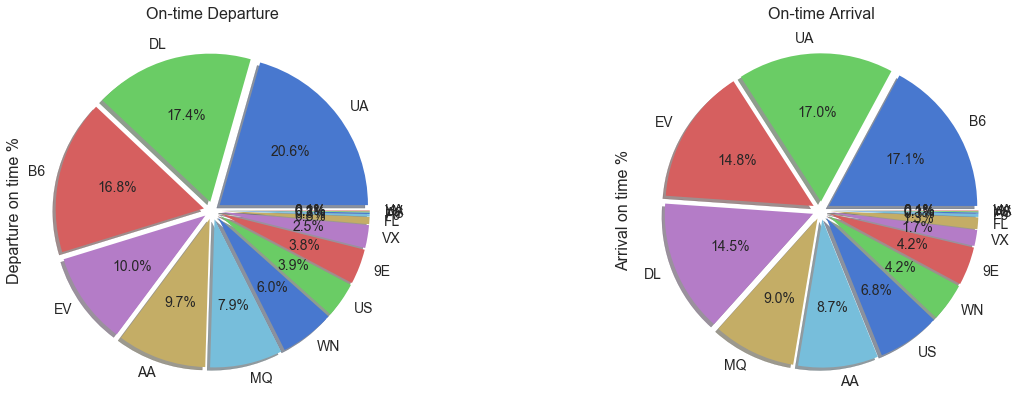

<Figure size 432x288 with 0 Axes>

In [477]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

df_nyc_flights[df_nyc_flights['dep_delay']==0].groupby(['carrier'])['dep_delay'].count().sort_values(ascending=False).plot.pie(explode=expld ,ax=ax1, autopct='%1.1f%%',shadow=True, textprops={'fontsize': 14})
df_nyc_flights[df_nyc_flights['arr_delay']==0].groupby(['carrier'])['arr_delay'].count().sort_values(ascending=False).plot.pie(explode=expld, ax=ax2, autopct='%1.1f%%',shadow=True, textprops={'fontsize': 14})

ax1.set_ylabel('Departure on time %',fontsize=16, labelpad=5)
ax1.title.set_text('On-time Departure')
ax1.title.set_fontsize(16)

ax2.set_ylabel('Arrival on time %',fontsize=16, labelpad=5)
ax2.title.set_text('On-time Arrival')
ax2.title.set_fontsize(16)

plt.show()
plt.savefig('Mapping_Avg_Delay_Departure_Arrival.png')

<a id=section608><a/>

<a id=section608></a>
### 6.2. Interesting observations through Analysis.

  - Now we are almost done various analysis on the NYC Flight dataset, there are few interesting facts observerd while analyzing the data, below are few,
  
 - There were __4037 flights operated__ from JFK, LGA, EWR on __multiple routes__ though out the year
 - Flight carrier __'N725MQ'__ travelled with maximum number in a year i.e. __544__
 - Total __168 flights__ with unique tailnum __travelled only Once__ in 2013
 - __Shortest distance__ flight was __80 miles__


In [559]:
# Only Flight carrier on a route 
df = df_nyc_flights.groupby(['tailnum'])['tailnum'].agg(['count'])

idf = df[df['count'] <= df['count'].max()]['count'].values.tolist()
len(idf)

# There were 4037 flights operated from JFK, LGA, EWR on multiple route though out the year
# flight carrier 'N725MQ' travelled maximum no in a year i.e. 544
# 168 flight carrier tailnum travel only once in 2013

# Shortest distance travelled

print("Shortest Distance :",df_nyc_flights["distance"].min(),"miles")

Shortest Distance : 80 miles


<a id=section7></a> 

### Conclusion

- The datasource has quite a good information on the departure of the flight.
- Total of __8255__ entries were NaN in dataset for dep_delay column. (__From: Section 6.1.3__)
- The most busy airport in terms of flight departures was EWR 35.80% and LGA was least 30.90%  (__From: Section 6.1.1__)
- Flight carrier __UA (United Airline)__ lead the charts when analysis was conducted on total number of flights, departure delays etc.
- The __max speed__ identified was __703 mph__ on the __route LGA-ATL__ for which the avg. speed was 404.97 mph (Distance = 762 miles)
- The __min speed__ identified was __76 mph__  on the __route LGA-PHL__ for which the avg. speed was 159.29 mph (Distance = 96 miles)
- Most __busy routes__ were __JFK-LAX :11159 flights__ and __LGA-ATL : 10041 flights__

- Actionable Insight
    - Arrang
    - Managers are support system for company - They should not be overly intrusive nor non intrusive, help people with the right guidance
    - Preferably managers should Not be Biased
    - Treament measures?
    - Regular appreciation of work